### Kuramoto-Sivashinsky Equation and spectral solution
We consider a periodic domain $[0,L)$ for the solution of the Kuramoto-Sivashinsky equation:
$$
\begin{align*}
u_t= -u_{xx} - u_{xxxx} - \frac12(u^2)_x.
\end{align*}
$$

Our periodic grid has $N$ points $\{x_n\}_{n=1}^N$, where $x_n = n\Delta x$ and $\Delta x = L/N$. With $N$ degrees of freedom we can write the solution $u(x,t)$ as a truncated Fourier expansion with $N$ modes:
$$
\begin{align*}
u(x,t) = \sum_{k=-N/2}^{N/2-1}\hat{u}_k(t)\exp\left(\frac{2\pi jkx}{L}\right).
\end{align*}
$$

We can thus write a system of ODEs for the coefficients $\hat{\mathbf{u}}=(\hat{u}_{-N/2},\hat{u}_{-N/2+1},\ldots,\hat{u}_{N/2-1})^\top$:
\begin{align*}
\hat{\mathbf{u}}_t = \mathbf{A}\hat{\mathbf{u}} + \mathbf{F}(\hat{\mathbf{u}})
\end{align*}
where the linear operator $\mathbf{A}$ is diagonal with entries $(2\pi k/L)^2 - (2\pi k/L)^4$ which come from the second and fourth spatial derivative terms, and the nonlinear operator $\mathbf{F}$ represents the flux term.

We solve the above ODEs with a Crank-Nicolson + Adams-Bashforth semi-implicit scheme. The implementation of the nonlinearity is naive and could likely be improved somehow.

# Function

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

'''
Generate random parameters with zero-mean and periodic boundary condition in [0, L]
(-D + τ^2)^{-d}
 
'''
def GRF1D(nx, L, theta, d=2.0, tau=3.0):
    n_KL = len(theta)
    assert(n_KL%2 == 0)
    theta_c, theta_s = theta[0:n_KL//2], theta[n_KL//2:]
    xx = np.linspace(0, L, nx)
    u = np.zeros(nx)
    for l in range(n_KL//2):
        lam = 1.0/( (2*np.pi*l/L)**d + tau**(2*d) )
        u += theta_c[l] * np.sqrt(lam)*np.sqrt(2/L) * np.cos(2*np.pi * xx/L)
        u += theta_s[l] * np.sqrt(lam)*np.sqrt(2/L) * np.sin(2*np.pi * xx/L)
    
    
    return u


def Kuramoto_Sivashinsky(L = 100, nx = 1024, T = 1000.0, dt = 0.05, u0=None, plot_or_not = True):
    
#     L  = 100
#     nx = 1024
#     dt = 0.05
#     T = 1000
    
    dx = L/nx
    nt = np.round(T/dt).astype(int)

    # meshes
    t = np.arange(stop=T+dt,step=dt)    # time mesh
    x = np.arange(stop=L,step=dx)       # space mesh
    k = np.arange(-nx/2,nx/2,1)         # wave numbers

    # pre-allocate space for solution
    u  = np.zeros((nx,nt+1))
    uh = np.zeros((nx,nt+1),dtype=complex)
    u2h_all = np.zeros((nx,nt+1),dtype=complex)

    # initial condition
    if u0 is None:
        u0 = np.cos((2*np.pi*x)/L) + 0.1*np.cos((4*np.pi*x)/L)
        
    u[:,0]  = u0
    uh[:,0] = 1/nx*np.fft.fftshift(np.fft.fft(u[:,0]))


    A = (2*np.pi*k/L)**2 - (2*np.pi*k/L)**4
    F = -0.5*(1j*2*np.pi*k/L)

    for i in range(nt):
        u2h = 1/nx*np.fft.fftshift(np.fft.fft(u[:,i]**2))
        u2h_all[:,i] = u2h
    #   u2h_conv = np.convolve(uh[:,i],uh[:,i])[nx//2:(nx+nx//2)]

        if i == 0:
            uh[:,i+1] =1/(1-0.5*dt*A)*((1+0.5*dt*A)*uh[:,i] + 1.0*dt*F*u2h)
            print(len(F))
            print(len(u2h))
        else:
            uh[:,i+1] =1/(1-0.5*dt*A)*((1+0.5*dt*A)*uh[:,i] + 1.5*dt*F*u2h-0.5*dt*F*u2hlast)
        u[:,i+1]  = np.real(nx*np.fft.ifft(np.fft.ifftshift(uh[:,i+1])))
        # clean 
        uh[:,i+1] = 1/nx*np.fft.fftshift(np.fft.fft(u[:,i+1]))
        u2hlast = u2h.copy()


    if plot_or_not:
        fig,ax = plt.subplots(figsize=(4,3))
        xx,tt=np.meshgrid(x,t)
        cs = ax.contourf(xx,tt,u.T,cmap="BrBG")
        fig.colorbar(cs)
        # plt.savefig('xt.pdf')
        plt.show()
    
    return u, uh, u2h_all, A, F

In [ ]:
nx = 512
k = np.arange(-nx/2,nx/2,1)
F = -0.5*(1j*2*np.pi*k/L)
dt=0.05
F*

In [45]:
np.fft.fftshift(range(1, 11))

array([ 6,  7,  8,  9, 10,  1,  2,  3,  4,  5])

[ 1.10000000e+00  1.09989458e+00  1.09957836e+00  1.09905143e+00
  1.09831393e+00  1.09736607e+00  1.09620811e+00  1.09484038e+00
  1.09326325e+00  1.09147718e+00  1.08948266e+00  1.08728024e+00
  1.08487054e+00  1.08225424e+00  1.07943205e+00  1.07640477e+00
  1.07317323e+00  1.06973835e+00  1.06610106e+00  1.06226238e+00
  1.05822338e+00  1.05398517e+00  1.04954893e+00  1.04491588e+00
  1.04008730e+00  1.03506452e+00  1.02984893e+00  1.02444197e+00
  1.01884511e+00  1.01305990e+00  1.00708791e+00  1.00093079e+00
  9.94590211e-01  9.88067906e-01  9.81365651e-01  9.74485267e-01
  9.67428622e-01  9.60197625e-01  9.52794232e-01  9.45220440e-01
  9.37478288e-01  9.29569856e-01  9.21497266e-01  9.13262675e-01
  9.04868284e-01  8.96316326e-01  8.87609075e-01  8.78748837e-01
  8.69737956e-01  8.60578806e-01  8.51273798e-01  8.41825372e-01
  8.32235999e-01  8.22508180e-01  8.12644446e-01  8.02647353e-01
  7.92519486e-01  7.82263454e-01  7.71881894e-01  7.61377462e-01
  7.50752839e-01  7.40010

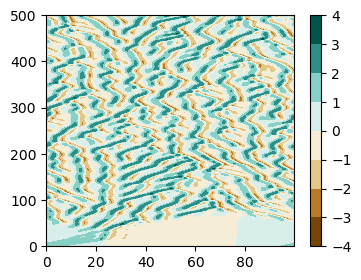

In [43]:
u, uh, u2h, A, F = Kuramoto_Sivashinsky(L = 100, nx = 512, T = 500.0, dt = 0.05, u0=None, plot_or_not = True);

In [46]:
u2h[:,0]

array([ 0.00000000e+00+0.00000000e+00j, -3.46944695e-18+4.62041732e-18j,
        0.00000000e+00-1.12214925e-17j,  3.46944695e-18+6.04004454e-18j,
        3.25260652e-18-3.09336432e-18j,  1.08420217e-18+1.64762649e-18j,
        4.33680869e-18-3.79470760e-18j,  5.96311195e-19+1.74927044e-18j,
        1.54146893e-17+3.58487635e-18j, -1.20258770e-18+3.16156091e-18j,
        5.42432262e-18-6.61438439e-18j, -2.16991911e-18-4.81589757e-18j,
        1.39038714e-18-3.01768765e-21j,  1.50031447e-18-2.79831928e-18j,
        1.53828908e-18+2.50043262e-18j,  2.49082353e-18+9.52620362e-19j,
        4.65033341e-18-1.54317435e-17j,  8.06112611e-18-4.72360876e-18j,
        1.01343805e-17-1.86262496e-17j,  1.24952683e-17+1.03481824e-17j,
        1.83040000e-18+1.10990891e-17j, -2.95713362e-18-1.97374498e-18j,
       -1.13613314e-17+1.43807677e-17j, -1.31931319e-17+3.58607508e-18j,
       -1.05978320e-17-1.72856773e-17j, -1.36150984e-18+2.54968662e-18j,
        2.52650338e-18+5.27779964e-18j, -3.44134872

In [34]:
uh[1:5,1]

array([ 0.00000000e+00+1.75030888e-17j, -3.46944695e-18-3.74049750e-18j,
        3.05884773e-19+5.36680075e-18j, -3.39782635e-18-2.39202104e-18j])

In [38]:

uh[1:5,1]

array([ 0.00000000e+00+1.75030888e-17j, -3.46944695e-18-3.74049750e-18j,
        3.05884773e-19+5.36680075e-18j, -3.39782635e-18-2.39202104e-18j])

In [31]:
u[:,1]

array([ 1.10027437e+00,  1.10022831e+00,  1.09997132e+00,  1.09950344e+00,
        1.09882477e+00,  1.09793545e+00,  1.09683571e+00,  1.09552581e+00,
        1.09400610e+00,  1.09227696e+00,  1.09033885e+00,  1.08819226e+00,
        1.08583778e+00,  1.08327602e+00,  1.08050766e+00,  1.07753345e+00,
        1.07435419e+00,  1.07097072e+00,  1.06738396e+00,  1.06359488e+00,
        1.05960450e+00,  1.05541390e+00,  1.05102421e+00,  1.04643663e+00,
        1.04165238e+00,  1.03667278e+00,  1.03149916e+00,  1.02613294e+00,
        1.02057556e+00,  1.01482852e+00,  1.00889339e+00,  1.00277177e+00,
        9.96465320e-01,  9.89975734e-01,  9.83304768e-01,  9.76454221e-01,
        9.69425940e-01,  9.62221815e-01,  9.54843783e-01,  9.47293824e-01,
        9.39573962e-01,  9.31686265e-01,  9.23632840e-01,  9.15415836e-01,
        9.07037442e-01,  8.98499887e-01,  8.89805435e-01,  8.80956392e-01,
        8.71955095e-01,  8.62803920e-01,  8.53505275e-01,  8.44061603e-01,
        8.34475379e-01,  

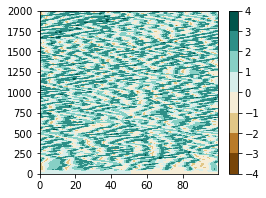

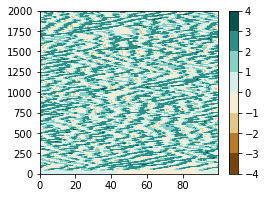

In [51]:
np.random.seed(42)
n_data = 2
nx = 1024
T = 2000.0
dt = 0.05
nt = np.round(T/dt).astype(int)

u0 = np.zeros((nx, n_data))
u,uh = np.zeros((nx, nt+1, n_data)), np.zeros((nx, nt+1, n_data),dtype=complex)

theta = np.random.normal(loc=0.0, scale=1.0, size=(1024,n_data))

for i_data in range(n_data):
    u0[:, i_data] = GRF1D(nx, L, theta[:,i_data], d=2.0, tau=3.0)
    u[:, :, i_data],uh[:, :, i_data] = Kuramoto_Sivashinsky(L = 100, nx = nx, T = T, dt = dt, u0=u0[:, i_data], plot_or_not = True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


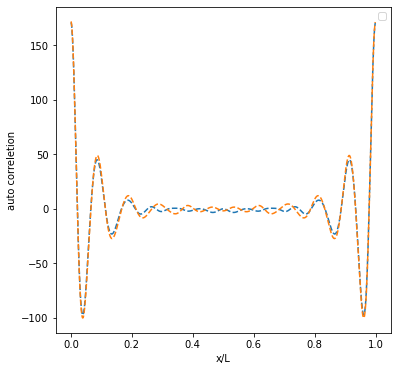

In [52]:
# Auto correlation
auto_correletion = np.zeros((nx, n_data))
for i_data in range(n_data):
    Cx = np.zeros((nx, nt))
    for i in range(nt):
        Cx[:, i] = np.real(nx*np.fft.ifft(np.fft.ifftshift(uh[:, i, i_data] * np.conj(uh[:, i, i_data])) )) 

    n_burn = nt//10
    auto_correletion[:, i_data] = L/(nt - n_burn) * (np.sum(Cx[:, n_burn:], axis=1)[:])

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x/L, auto_correletion, "--")
ax.set_xlabel("x/L")
ax.set_ylabel("auto correletion")
ax.legend()

/var/folders/sq/9dntw6953x7fn5kvr7xqnr680000gn/T/ipykernel_9773/2366425517.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  Ex[:, i] = (np.fft.ifftshift(uh[:, i, i_data] * np.conj(uh[:, i, i_data])))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


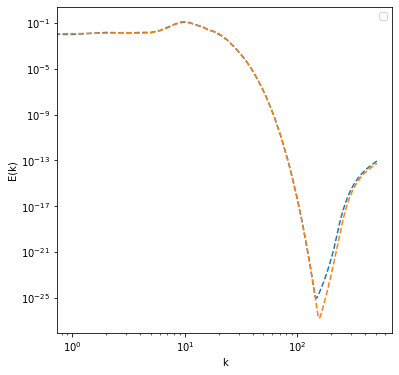

In [53]:
# Energy spectral
energy_spectral = np.zeros((nx, n_data))
for i_data in range(n_data):
    Ex = np.zeros((nx, nt))
    for i in range(nt):
        Ex[:, i] = (np.fft.ifftshift(uh[:, i, i_data] * np.conj(uh[:, i, i_data])))

    n_burn = nt//10
    energy_spectral[:, i_data] = 1/(nt - n_burn) *(np.sum(Ex[:, n_burn:], axis=1))


fig, ax = plt.subplots(figsize=(6,6))
ax.loglog(energy_spectral[1:nx//2, :], "--")
ax.set_xlabel("k")
ax.set_ylabel("E(k)")
ax.legend()


In [54]:
# print(nx/3)
# uh_trunc = uh[:,i].copy()
# uh_trunc[:170] = 0
# uh_trunc[-170:] = 0
# temp = np.convolve(uh_trunc,uh_trunc)[nx//2:(nx+nx//2)]


M = nx*3//2
xM = np.arange(stop=L,step=L/M)       # space mesh
uh_pad = np.zeros((M,),dtype=complex)
uh_pad[M//6:-M//6] = uh[:,i]
u_pad = M*np.fft.ifft(np.fft.ifftshift(uh_pad))


u2h_pad = 1/M*np.fft.fftshift(np.fft.fft(u_pad**2))[M//6:-M//6]
# u2h_conv = np.convolve(uh_pad,uh_pad)[nx//2:(nx+nx//2)]
u2h_conv = np.convolve(uh_pad,uh_pad,"same")[M//6:-M//6]
print(np.linalg.norm(u2h-u2h_conv))
print(np.linalg.norm(u2h-u2h_pad))
print(np.linalg.norm(u2h_conv-u2h_pad))


fig,ax = plt.subplots(2,2,figsize=(8,5))
ax[0,0].plot(x,u[:,i],label="ifft(uh)")
ax[0,0].plot(xM,u_pad,linestyle="dotted",label="ifft(uh_pad)")
ax[0,0].legend()
ax[0,0].set_ylabel("u")
ax[0,1].plot(k,uh[:,i])
ax[0,1].set_ylabel("$\hat{u}$")
ax[1,0].plot(u[:,i]**2)
ax[1,0].set_ylabel("$u^2$")
ax[1,1].plot(k,u2h,label="fft(u**2)")
ax[1,1].plot(k,u2h_conv,linestyle="dotted",label="conv(uh,uh)")
ax[1,1].plot(k,u2h_pad,linestyle="dashed")
ax[1,1].set_ylabel("$\hat{u}^2$")
ax[1,1].legend()
plt.tight_layout()
# plt.savefig('temp.pdf')
# plt.close("all")


ValueError: could not broadcast input array from shape (1024,2) into shape (1024,)

In [40]:

# print(nx/3)
# uh_trunc = uh[:,i].copy()
# uh_trunc[:170] = 0
# uh_trunc[-170:] = 0
# temp = np.convolve(uh_trunc,uh_trunc)[nx//2:(nx+nx//2)]



xM = np.arange(stop=L,step=L/nx)       # space mesh
uh_pad = np.zeros((nx,),dtype=complex)
uh_pad[nx//6:-nx//6] = uh[nx//6:-nx//6,i]
u_pad = nx*np.fft.ifft(np.fft.ifftshift(uh_pad))


u2h_pad = 1/nx*np.fft.fftshift(np.fft.fft(u_pad**2))[nx//6:-nx//6]
# u2h_conv = np.convolve(uh_pad,uh_pad)[nx//2:(nx+nx//2)]
u2h_conv = np.convolve(uh_pad,uh_pad,"same")[nx//6:-nx//6]
print(np.linalg.norm(u2h-u2h_conv))
print(np.linalg.norm(u2h-u2h_pad))
print(np.linalg.norm(u2h_conv-u2h_pad))


fig,ax = plt.subplots(2,2,figsize=(8,5))
ax[0,0].plot(x,u[:,i],label="ifft(uh)")
ax[0,0].plot(xM,u_pad,linestyle="dotted",label="ifft(uh_pad)")
ax[0,0].legend()
ax[0,0].set_ylabel("u")
ax[0,1].plot(k,uh[:,i])
ax[0,1].set_ylabel("$\hat{u}$")
ax[1,0].plot(u[:,i]**2)
ax[1,0].set_ylabel("$u^2$")
ax[1,1].plot(k,u2h,label="fft(u**2)")
ax[1,1].plot(k,u2h_conv,linestyle="dotted",label="conv(uh,uh)")
ax[1,1].plot(k,u2h_pad,linestyle="dashed")
ax[1,1].set_ylabel("$\hat{u}^2$")
ax[1,1].legend()
plt.tight_layout()
# plt.savefig('temp.pdf')
# plt.close("all")



ValueError: operands could not be broadcast together with shapes (1024,) (683,) 

In [22]:
# uh


M = nx*3//2
xM = np.arange(stop=L,step=L/M)       # space mesh
uh_pad = np.zeros((M,),dtype=complex)
uh_pad[M//6:-M//6] = uh[:,i]
u_pad = np.real(M*np.fft.ifft(np.fft.ifftshift(uh_pad)))


u2h_pad = 1/M*np.fft.fftshift(np.fft.fft(u_pad**2))[M//6:-M//6]
u2h_conv = np.convolve(uh[:,i],uh[:,i])[nx//2:(nx+nx//2)]
u2h_conv = np.convolve(uh_pad,uh_pad,"same")[M//6:-M//6]
print(np.linalg.norm(u2h-u2h_conv))
print(np.linalg.norm(u2h-u2h_pad))
print(np.linalg.norm(u2h_conv-u2h_pad))

3.8490188989145144
1.3093647430330627e-15
3.849018898914514


In [ ]:
nu = 1
L  = 1
nx = 8  ## SMALL MESH FOR TESTING QUAD NONLINEARITY
dx = L/nx

dt = 0.05
T = 200
nt = np.round(T/dt).astype(int)

# meshes
t = np.arange(stop=T+dt,step=dt)    # time mesh
x = np.arange(stop=L,step=dx)       # space mesh
k = np.arange(-nx/2,nx/2,1)         # wave number
k2 = np.arange(-nx,nx-1)

# initial condition
u_test  = np.cos((2*np.pi*x)/L) + 0.1*np.cos((4*np.pi*x)/L)
uh_test = 1/nx*np.fft.fftshift(np.fft.fft(u_test))
u2h_naive = 1/nx*np.fft.fftshift(np.fft.fft(u_test**2))

# plot initial state, squared initial state, and FFTs of the result
fig,ax = plt.subplots(2,2,figsize=(8,5))
ax[0,0].plot(u_test)
ax[0,0].set_ylabel("u")
ax[0,1].plot(k,uh_test)
ax[0,1].set_ylabel("$\hat{u}$")
ax[1,0].plot(u_test**2)
ax[1,0].set_ylabel("$u^2$")
ax[1,1].plot(k,u2h_naive)
ax[1,1].set_ylabel("$\hat{u}^2$")

# attempt to calculate FFT of u2 from FFT of u without going back to statespace
temp = k[:,None] + k[None,:]
boo = np.convolve(uh_test,uh_test,mode="full")

ax[1,1].plot(k,boo[nx//2:(nx+nx//2)],linestyle="dashed")
ax[1,1].set_xticks(np.arange(-8,7))

plt.tight_layout()
plt.savefig('temp.pdf')
plt.close("all")

[ 4.33334237e-34+0.00000000e+00j  0.00000000e+00-7.22223729e-35j
  2.08166817e-18+0.00000000e+00j  2.08166817e-17-1.73472348e-19j
  2.50000000e-03-1.73472348e-18j  5.00000000e-02+5.72458747e-18j
  2.50000000e-01+5.55111512e-17j  5.00000000e-02-5.89805982e-18j
  5.05000000e-01+0.00000000e+00j  5.00000000e-02+5.89805982e-18j
  2.50000000e-01-5.55111512e-17j  5.00000000e-02-5.72458747e-18j
  2.50000000e-03+1.73472348e-18j  0.00000000e+00+1.73472348e-19j
 -3.00926554e-36+0.00000000e+00j]
4


/Users/elizqian/miniconda3/envs/koi/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/elizqian/miniconda3/envs/koi/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/elizqian/miniconda3/envs/koi/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


: 

: 

: 